In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


Import the dataset

In [2]:
df = pd.read_csv(r'/Users/anastassiyayegarmina/Documents/dev/FMRI/hcp_behavior_unfiltered.csv')

# Preview the first few rows
df.head()




,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88


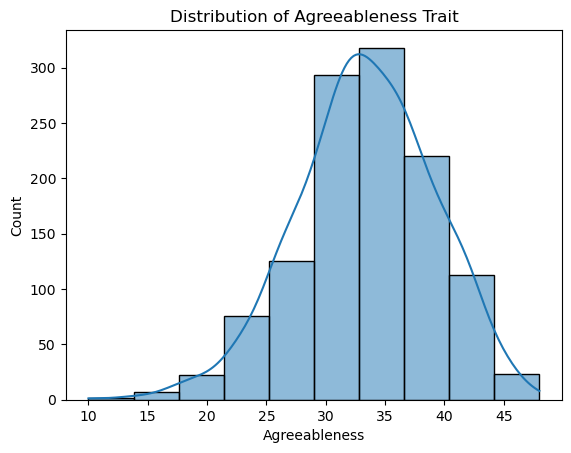

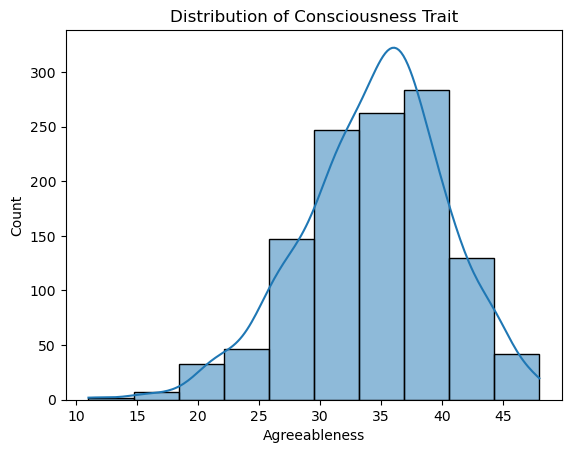

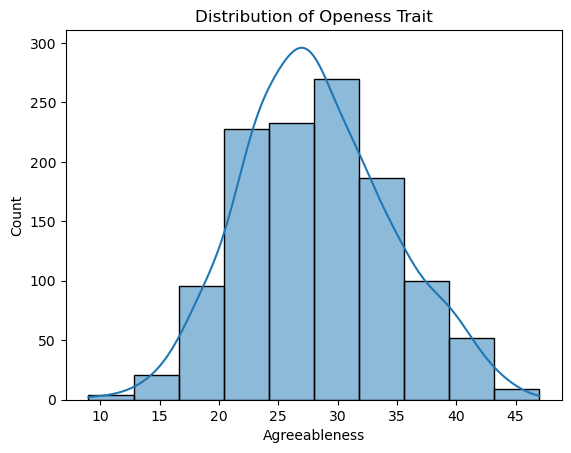

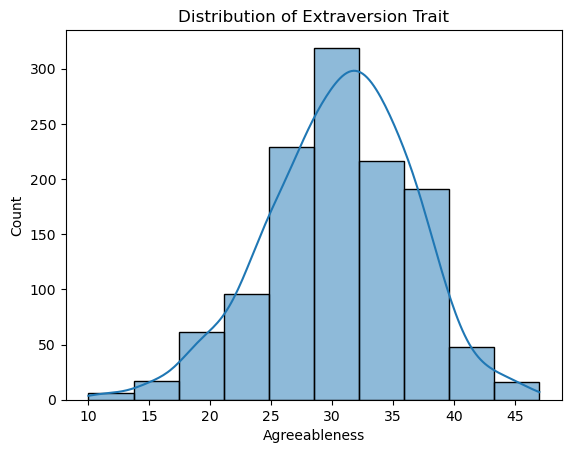

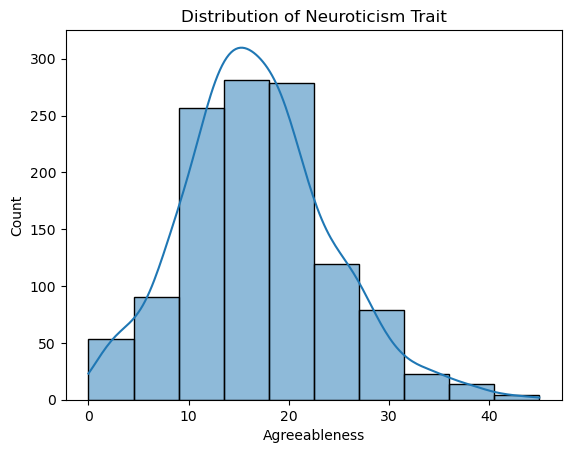

In [3]:
## Basic EDA to visualize the distribution of each big five traits
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['NEOFAC_A'], bins=10, kde=True)
plt.title('Distribution of Agreeableness Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_C'], bins=10, kde=True)
plt.title('Distribution of Consciousness Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_O'], bins=10, kde=True)
plt.title('Distribution of Openess Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_E'], bins=10, kde=True)
plt.title('Distribution of Extraversion Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()

sns.histplot(df['NEOFAC_N'], bins=10, kde=True)
plt.title('Distribution of Neuroticism Trait')
plt.xlabel('Agreeableness')
plt.ylabel('Count')
plt.show()


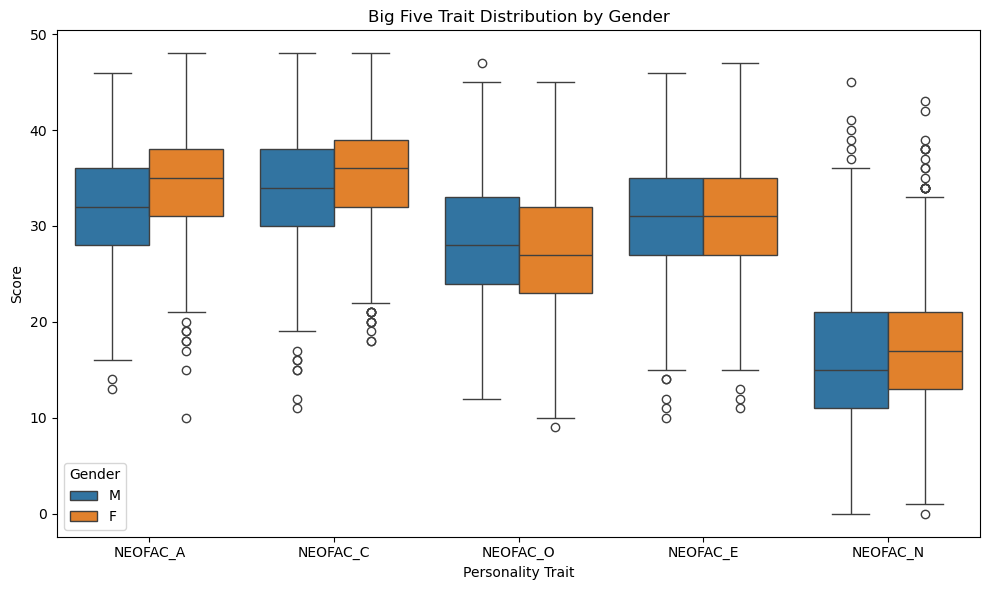

In [4]:
#visualize the differences in agreableness amongst the two genders

# Plot boxplots

df_long = pd.melt(df,
                  id_vars='Gender',
                  value_vars=['NEOFAC_A', 'NEOFAC_C', 'NEOFAC_O', 'NEOFAC_E', 'NEOFAC_N'],
                  var_name='Trait',
                  value_name='Score')


plt.figure(figsize=(10, 6))
sns.boxplot(x='Trait', y='Score', hue='Gender', data=df_long)

plt.title('Big Five Trait Distribution by Gender')
plt.xlabel('Personality Trait')
plt.ylabel('Score')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


List of things to verify
Pre-processing
- Extreme score $
- Sample size
- Missing data $

Postulats
- Indépendance des scores
- Normalité
- Normalité des résiduels et de l'homoscédasticité
- Homogénéité de la variance des résiduels
- Matrice de corrélation
- Multicolinéarité


In [5]:
import numpy as np
from scipy import stats

relevant_columns = ['Subject','Age','Gender','NEOFAC_A','NEOFAC_C','NEOFAC_N','NEOFAC_O','NEOFAC_E' ] ##insert relevant column
subset = df[relevant_columns]

#Transform gender column
subset["Gender_binary"] = subset["Gender"].map({"M":0,"F":1})

#Transform age column

subset = subset[subset["Age"] != "36+"]
def get_midpoint(age_range):
    start, end = map(int, age_range.split("-"))
    return (start + end) / 2

# Apply to the age range column (replace 'AgeRange' with your actual column name)
subset["AgeMidpoint"] = subset["Age"].apply(get_midpoint)



/var/folders/14/fyn548lx1tl591tyqq2jlv_r0000gn/T/ipykernel_97036/1113691861.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Gender_binary"] = subset["Gender"].map({"M":0,"F":1})


Outlier indices: (array([  61,   92,  101,  103,  173,  175,  175,  201,  201,  225,  246,
        246,  350,  410,  431,  431,  602,  632,  721,  837,  960, 1057,
       1135, 1140]), array([1, 5, 3, 5, 3, 2, 5, 2, 3, 2, 2, 3, 3, 2, 1, 3, 5, 5, 3, 4, 1, 1,
       2, 4]))


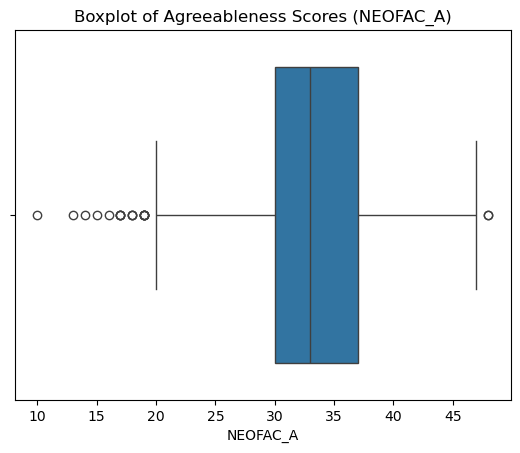

In [9]:
# Keep only numeric columns
numeric_subset = subset.select_dtypes(include=[np.number])

# Compute z-scores
z_scores = np.abs(stats.zscore(numeric_subset, nan_policy='omit'))

# Identify outlier locations
outliers = np.where(z_scores > 3)
print("Outlier indices:", outliers)


sns.boxplot(x=subset['NEOFAC_A'])
plt.title("Boxplot of Agreeableness Scores (NEOFAC_A)")
plt.xlabel("NEOFAC_A")
plt.show()


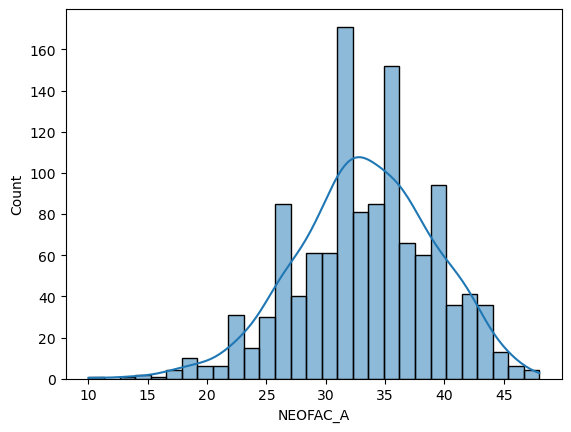

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

#Normalité de la distribution

sns.histplot(df['NEOFAC_A'], kde=True)
plt.show()

In [7]:
import numpy as np
from scipy.stats import chi2_contingency


chi2, p, dof, expected = chi2_contingency(df['NEOFAC_A'])

print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2: 0.0
p-value: 1.0
Degrees of Freedom: 0
Expected Frequencies:
[27. 29. 37. ... 28. 27. 34.]


p-value is over 0.05, so that means that there isn't a significant relationship between the data!

Shapiro-Wilk test p-value: 7.211587516322471e-05


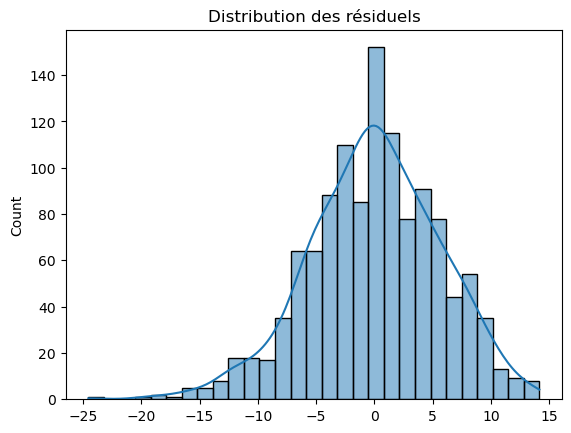

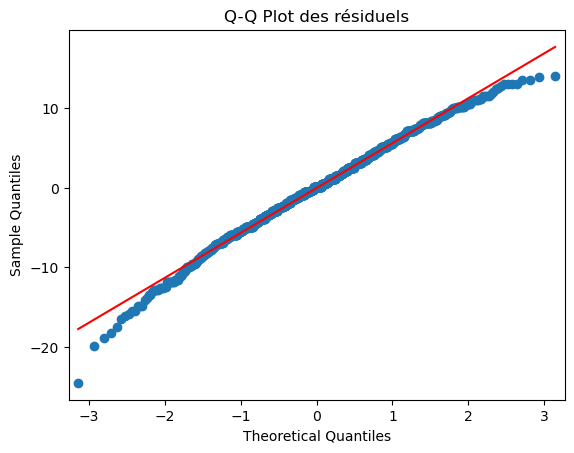

In [8]:
#Residual's normality

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Exemple : modèle linéaire avec agreeableness comme variable dépendante
model = smf.ols('NEOFAC_A ~ Age + Gender', data=df).fit()
residuals = model.resid

from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {p_value}")

sns.histplot(residuals, kde=True)
plt.title("Distribution des résiduels")
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot des résiduels")
plt.show()





Shapiro p-value is 7.211, so the residuals are normally distributes

{'Lagrange multiplier statistic': np.float64(1.8039528261684739), 'p-value': np.float64(0.7717590800391032), 'f-value': np.float64(0.44978424367708464), 'f p-value': np.float64(0.7726126682632707)}


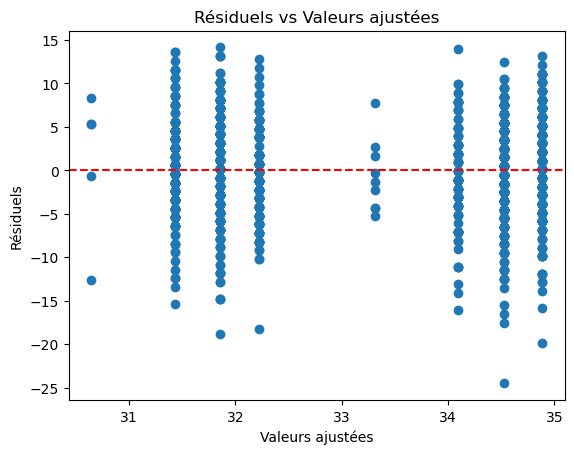

In [9]:
#homoscedasticity

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résiduels")
plt.title("Résiduels vs Valeurs ajustées")
plt.show()



In [10]:
#multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Créer un DataFrame des variables explicatives (sans constante)
X = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
X = X.drop(columns='Intercept', errors='ignore')  # si présente

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


       Variable       VIF
0  Age[T.26-30]  1.279737
1  Age[T.31-35]  1.139036
2    Age[T.36+]  1.004630
3   Gender[T.M]  1.423403


From now on, I will upload the data from the fMRI.ipynb, which is the average contrast of the TPJ, mPFC, PCC, and merge it with the Big Five personnality trait, to start our analysis

In [11]:
DNM_TOM = pd.read_csv('TPJ-MPFC-PCC.csv')

#merge Brain data + personnality data
DNM_TOM  = DNM_TOM .rename(columns={'subject': 'Subject'})

merged_df = pd.merge(DNM_TOM , subset, on='Subject') 

merged_df.head()
merged_df.to_csv('df_ml_task.csv', index=False)

In [12]:
#First, let's do a linear regression
import statsmodels.api as sm

# Predict Agreeableness from brain activation
X = merged_df[['MPFC_R','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:               NEOFAC_A   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.065
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.368
Time:                        18:56:20   Log-Likelihood:                -321.25
No. Observations:                 100   AIC:                             650.5
Df Residuals:                      96   BIC:                             660.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.1537      5.731      4.564

In [13]:
# Predict Agreeableness from brain activation
X = merged_df[['MPFC_L','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:               NEOFAC_A   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.163
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.328
Time:                        18:56:23   Log-Likelihood:                -321.10
No. Observations:                 100   AIC:                             650.2
Df Residuals:                      96   BIC:                             660.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.7249      5.778      4.452

In [14]:
# Predict Agreeableness from brain activation
X = merged_df[['TPJ_R','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NEOFAC_A   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.062
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.369
Time:                        18:56:25   Log-Likelihood:                -321.25
No. Observations:                 100   AIC:                             650.5
Df Residuals:                      96   BIC:                             660.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.1548      5.732      4.563

In [15]:
# Predict Agreeableness from brain activation
X = merged_df[['TPJ_L','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NEOFAC_A   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.103
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.352
Time:                        18:56:31   Log-Likelihood:                -321.19
No. Observations:                 100   AIC:                             650.4
Df Residuals:                      96   BIC:                             660.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            25.9053      5.773      4.487

In [16]:
# Predict Agreeableness from brain activation
X = merged_df[['PCC_R','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NEOFAC_A   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.066
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.367
Time:                        18:56:34   Log-Likelihood:                -321.24
No. Observations:                 100   AIC:                             650.5
Df Residuals:                      96   BIC:                             660.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.2293      5.776      4.541

In [17]:
# Predict Agreeableness from brain activation
X = merged_df[['PCC_L','AgeMidpoint','Gender_binary']]
X = sm.add_constant(X)  # Adds intercept term
y = merged_df['NEOFAC_A']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               NEOFAC_A   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.107
Date:                Wed, 23 Jul 2025   Prob (F-statistic):              0.350
Time:                        18:56:42   Log-Likelihood:                -321.18
No. Observations:                 100   AIC:                             650.4
Df Residuals:                      96   BIC:                             660.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            26.0244      5.739      4.535

In [18]:
corr_results = merged_df[['MPFC_R', 'TPJ_R', 'PCC_R','MPFC_L', 'TPJ_L', 'PCC_L', 'NEOFAC_A']].corr()
print(corr_results['NEOFAC_A'])


MPFC_R      0.026524
TPJ_R      -0.005819
PCC_R      -0.011686
MPFC_L     -0.034278
TPJ_L      -0.002064
PCC_L      -0.003659
NEOFAC_A    1.000000
Name: NEOFAC_A, dtype: float64


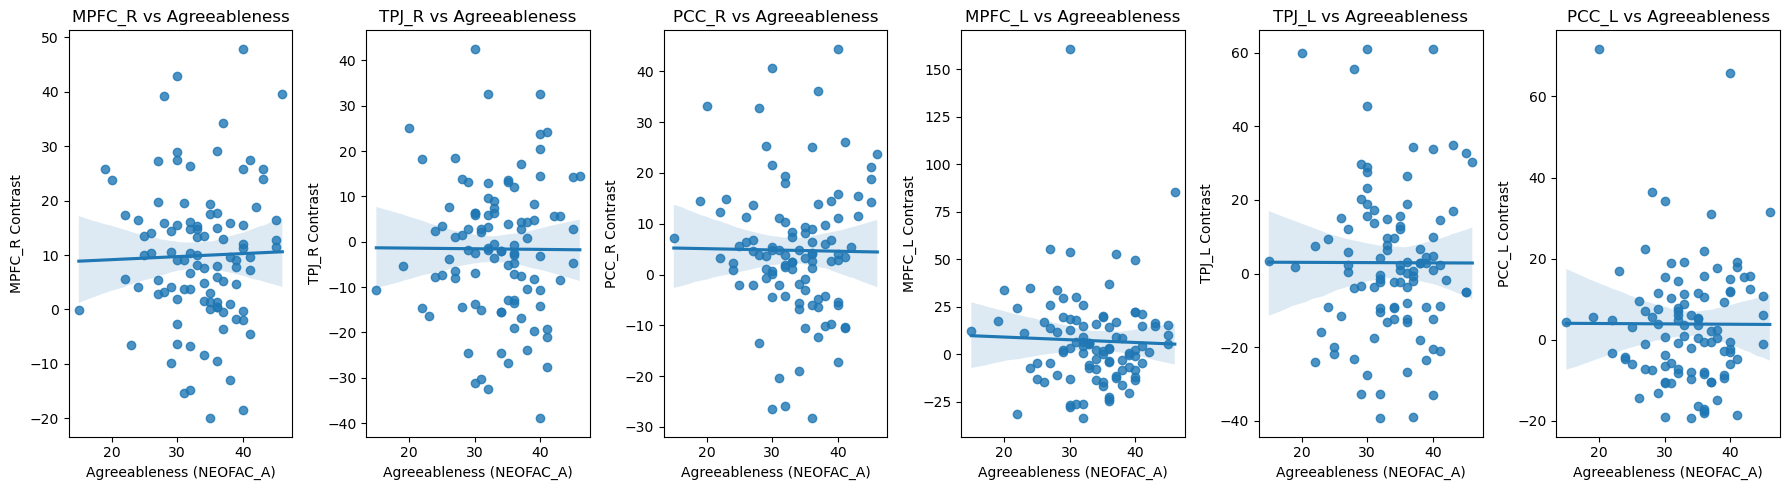

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

regions = ['MPFC_R', 'TPJ_R', 'PCC_R', 'MPFC_L', 'TPJ_L', 'PCC_L']

# Set up subplots
fig, axes = plt.subplots(1, 6, figsize=(18, 5))

# Plot each region
for i, region in enumerate(regions):
    sns.regplot(data=merged_df, x='NEOFAC_A', y=region, ax=axes[i])
    axes[i].set_title(f'{region} vs Agreeableness')
    axes[i].set_xlabel('Agreeableness (NEOFAC_A)')
    axes[i].set_ylabel(f'{region} Contrast')

plt.tight_layout()
plt.show()


Our Goal: 

Do the selected brain regions predict any personality traits?


Trait: NEOFAC_A | Model: SVM
CV Accuracy: 0.567 ± 0.062
Train Accuracy: 0.683
Validation Accuracy: 0.600
Test Accuracy: 0.350
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.58      0.70      0.64        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.30      0.33      0.32         9

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20



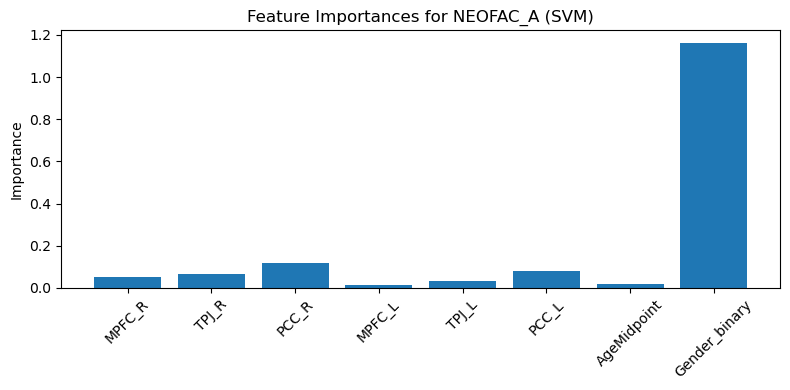


Trait: NEOFAC_A | Model: SGD
CV Accuracy: 0.500 ± 0.105
Train Accuracy: 0.667
Validation Accuracy: 0.600
Test Accuracy: 0.400
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.62      0.50      0.56        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



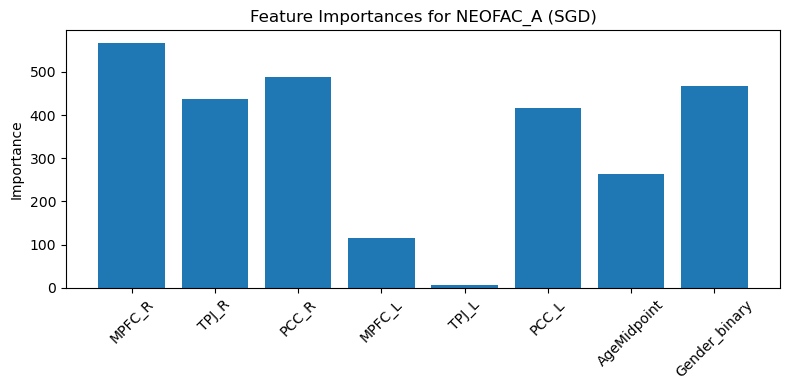


Trait: NEOFAC_A | Model: Logistic Regression
CV Accuracy: 0.583 ± 0.075
Train Accuracy: 0.683
Validation Accuracy: 0.500
Test Accuracy: 0.250
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.50      0.70      0.58        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.18      0.21        11
           1       0.25      0.33      0.29         9

    accuracy                           0.25        20
   macro avg       0.25      0.26      0.25        20
weighted avg       0.25      0.25      0.24        20



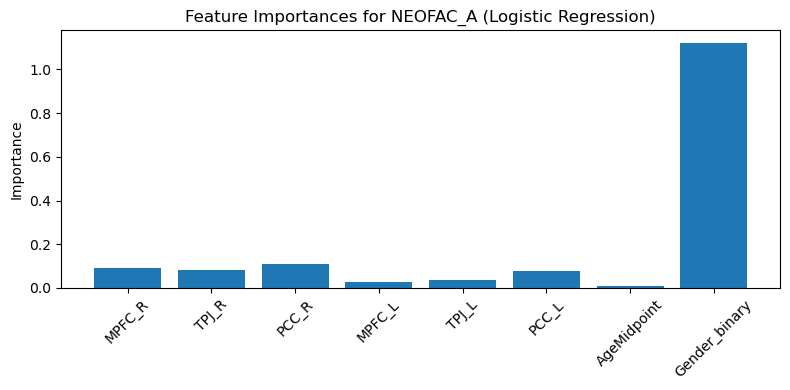


Trait: NEOFAC_C | Model: SVM
CV Accuracy: 0.400 ± 0.143
Train Accuracy: 0.600
Validation Accuracy: 0.650
Test Accuracy: 0.400
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



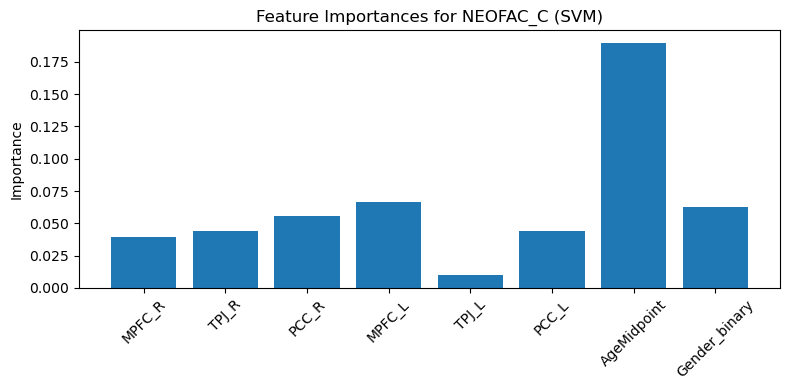


Trait: NEOFAC_C | Model: SGD
CV Accuracy: 0.517 ± 0.082
Train Accuracy: 0.533
Validation Accuracy: 0.500
Test Accuracy: 0.500
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20



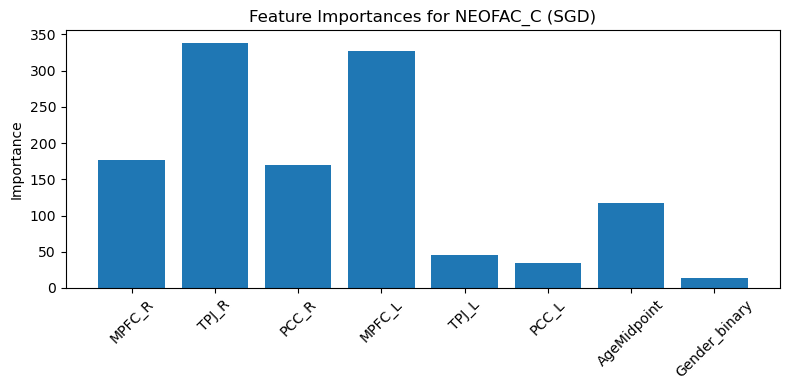


Trait: NEOFAC_C | Model: Logistic Regression
CV Accuracy: 0.467 ± 0.155
Train Accuracy: 0.617
Validation Accuracy: 0.600
Test Accuracy: 0.400
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.60      0.60      0.60        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        11
           1       0.33      0.33      0.33         9

    accuracy                           0.40        20
   macro avg       0.39      0.39      0.39        20
weighted avg       0.40      0.40      0.40        20



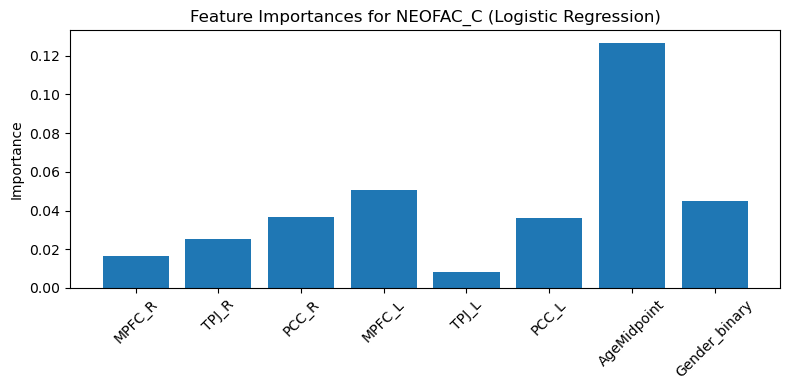


Trait: NEOFAC_N | Model: SVM
CV Accuracy: 0.417 ± 0.053
Train Accuracy: 0.600
Validation Accuracy: 0.600
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.67      0.40      0.50        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



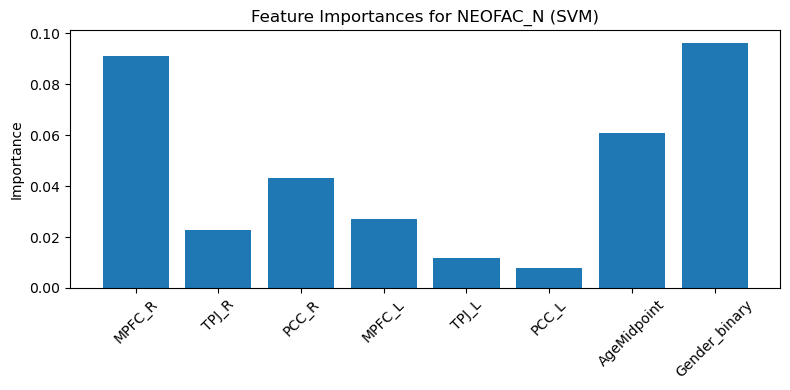


Trait: NEOFAC_N | Model: SGD
CV Accuracy: 0.583 ± 0.075
Train Accuracy: 0.583
Validation Accuracy: 0.550
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.45      0.53        11
           1       0.50      0.67      0.57         9

    accuracy                           0.55        20
   macro avg       0.56      0.56      0.55        20
weighted avg       0.57      0.55      0.55        20



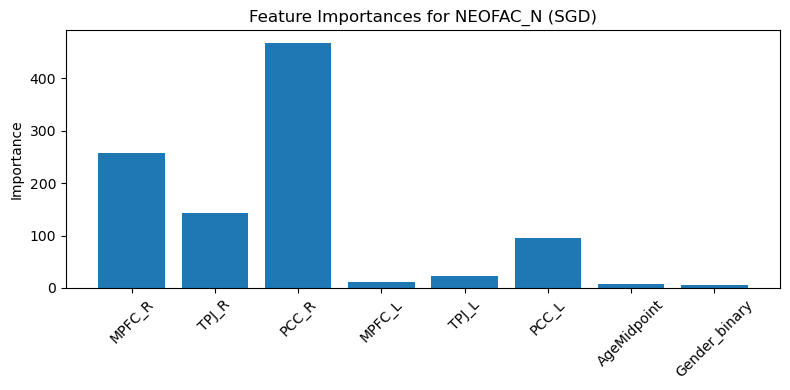


Trait: NEOFAC_N | Model: Logistic Regression
CV Accuracy: 0.433 ± 0.097
Train Accuracy: 0.617
Validation Accuracy: 0.450
Test Accuracy: 0.650
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.40      0.20      0.27        10

    accuracy                           0.45        20
   macro avg       0.43      0.45      0.41        20
weighted avg       0.43      0.45      0.41        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



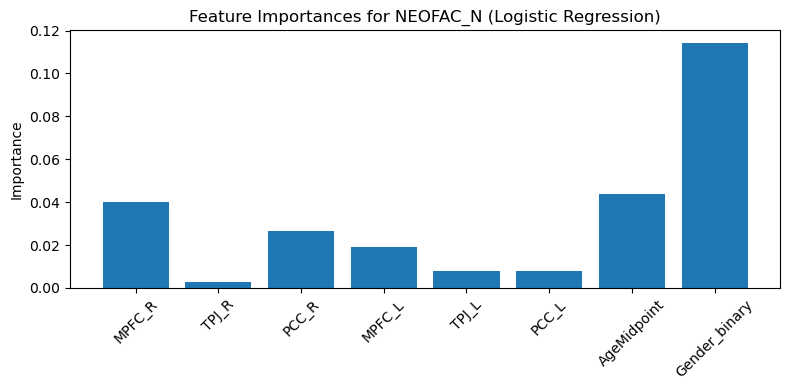


Trait: NEOFAC_O | Model: SVM
CV Accuracy: 0.533 ± 0.145
Train Accuracy: 0.733
Validation Accuracy: 0.600
Test Accuracy: 0.600
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



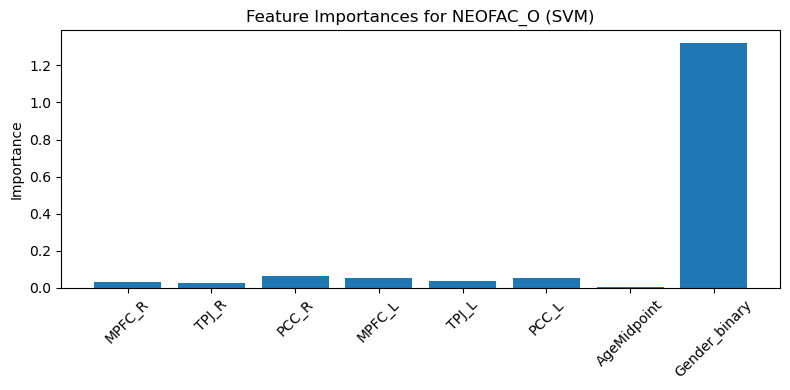


Trait: NEOFAC_O | Model: SGD
CV Accuracy: 0.550 ± 0.041
Train Accuracy: 0.567
Validation Accuracy: 0.650
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.22      0.31         9

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20



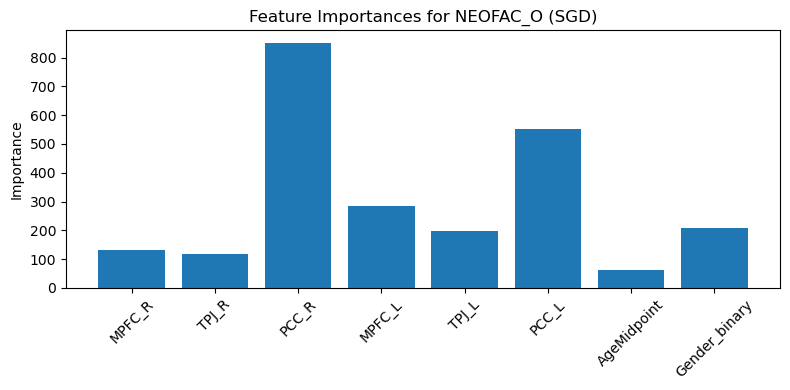


Trait: NEOFAC_O | Model: Logistic Regression
CV Accuracy: 0.550 ± 0.125
Train Accuracy: 0.700
Validation Accuracy: 0.600
Test Accuracy: 0.500
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.40      0.22      0.29         9

    accuracy                           0.50        20
   macro avg       0.47      0.47      0.45        20
weighted avg       0.47      0.50      0.47        20



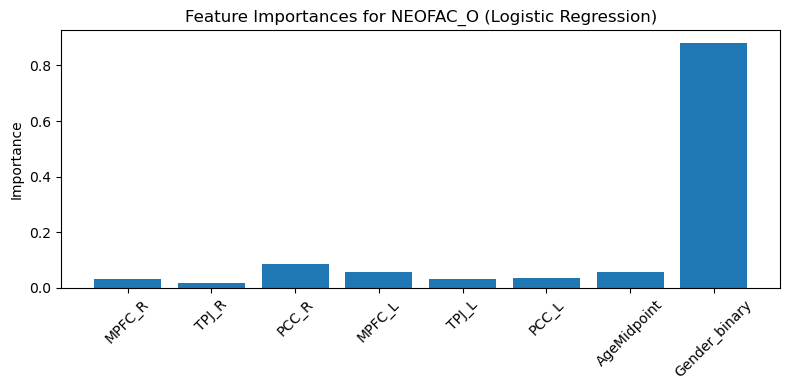


Trait: NEOFAC_E | Model: SVM
CV Accuracy: 0.417 ± 0.075
Train Accuracy: 0.550
Validation Accuracy: 0.600
Test Accuracy: 0.600
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.55      0.67      0.60         9

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20



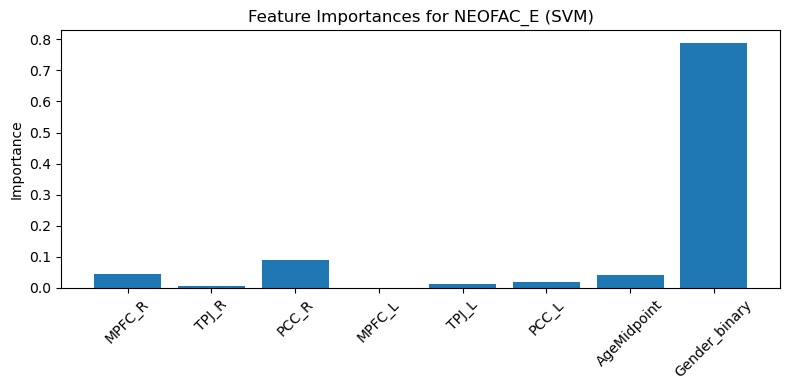


Trait: NEOFAC_E | Model: SGD
CV Accuracy: 0.483 ± 0.062
Train Accuracy: 0.467
Validation Accuracy: 0.400
Test Accuracy: 0.500
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        11
           1       0.29      0.22      0.25         9

    accuracy                           0.40        20
   macro avg       0.37      0.38      0.38        20
weighted avg       0.38      0.40      0.39        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.44      0.44      0.44         9

    accuracy                           0.50        20
   macro avg       0.49      0.49      0.49        20
weighted avg       0.50      0.50      0.50        20



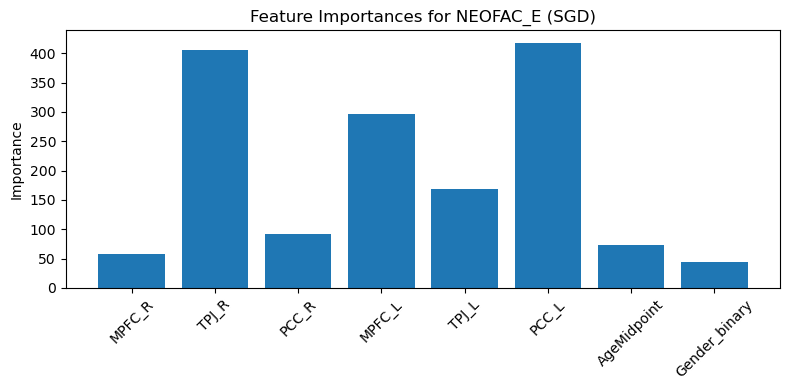


Trait: NEOFAC_E | Model: Logistic Regression
CV Accuracy: 0.417 ± 0.118
Train Accuracy: 0.600
Validation Accuracy: 0.600
Test Accuracy: 0.650
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.67      0.22      0.33         9

    accuracy                           0.60        20
   macro avg       0.63      0.57      0.52        20
weighted avg       0.62      0.60      0.54        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72        11
           1       0.67      0.44      0.53         9

    accuracy                           0.65        20
   macro avg       0.65      0.63      0.63        20
weighted avg       0.65      0.65      0.64        20



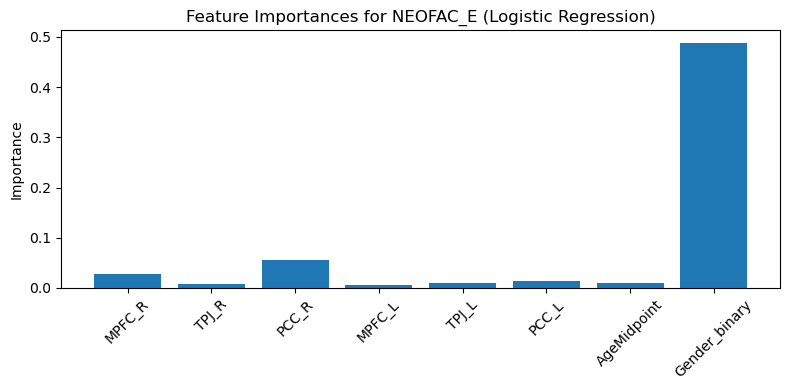

In [ ]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, RocCurveDisplay

# Load data
df = pd.read_csv('df_ml_task.csv')
all_features = ['MPFC_R','TPJ_R','PCC_R','MPFC_L','TPJ_L','PCC_L','AgeMidpoint','Gender_binary']
features = ['MPFC_R','TPJ_R','PCC_R','MPFC_L','TPJ_L','PCC_L']
traits = ['NEOFAC_A','NEOFAC_C','NEOFAC_N','NEOFAC_O','NEOFAC_E']

models = {
    'SVM': SVC(kernel='linear', C=1.0, probability= True) ,
    'SGD': SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}
# 1 STEP Training for all features
results = {trait: {} for trait in traits}

for trait in traits:
    # Binarize target using median split
    median = df[trait].median()
    y = (df[trait] > median).astype(int)
    X = df[all_features]
    # Split train (60%), temp (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    # Split temp into val (20%) and test (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    for model_name, model in models.items():
        # Cross-validation on train
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        y_train_proba = model.predict_proba(X_train)
        y_val_proba = model.predict_proba(X_val)
        y_test_proba = model.predict_proba(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        train_auc = roc_auc_score(y_train, y_train_proba[:, 1])
        val_auc = roc_auc_score(y_val, y_val_proba[:, 1])
        test_auc = roc_auc_score(y_test, y_test_proba[:, 1])
        results[trait][model_name] = {
            'cv_scores': cv_scores,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_acc': test_acc,
            'val_report': classification_report(y_val, y_val_pred, output_dict=True),
            'test_report': classification_report(y_test, y_test_pred, output_dict=True),
        }
        # Feature importances or coefficients
        if hasattr(model, 'feature_importances_'):
            results[trait][model_name]['importances'] = model.feature_importances_
        elif hasattr(model, 'coef_'):
            results[trait][model_name]['importances'] = np.abs(model.coef_[0])
        else:
            results[trait][model_name]['importances'] = None

        print(f'\nTrait: {trait} | Model: {model_name}')
        print(f'CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')
        print(f'Train Accuracy: {train_acc:.3f}')
        print(f'Validation Accuracy: {val_acc:.3f}')
        print(f'Test Accuracy: {test_acc:.3f}')
        print('Validation Classification Report:')
        print(classification_report(y_val, y_val_pred))
        print('Test Classification Report:')
        print(classification_report(y_test, y_test_pred))
        # Plot feature importances if available
        if results[trait][model_name]['importances'] is not None:
            plt.figure(figsize=(8,4))
            plt.bar(all_features, results[trait][model_name]['importances'])
            plt.title(f'Feature Importances for {trait} ({model_name})')
            plt.ylabel('Importance')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


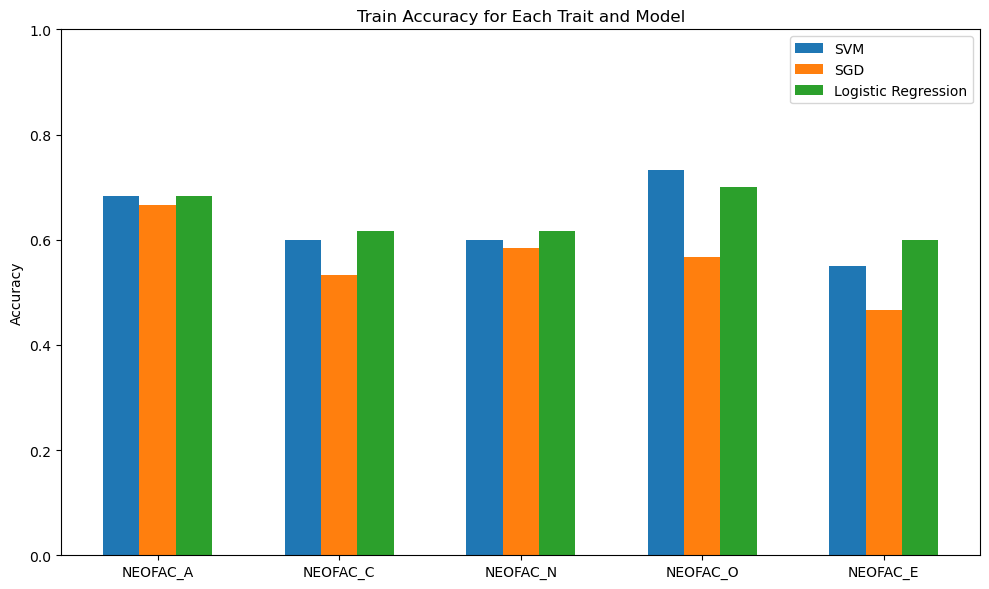

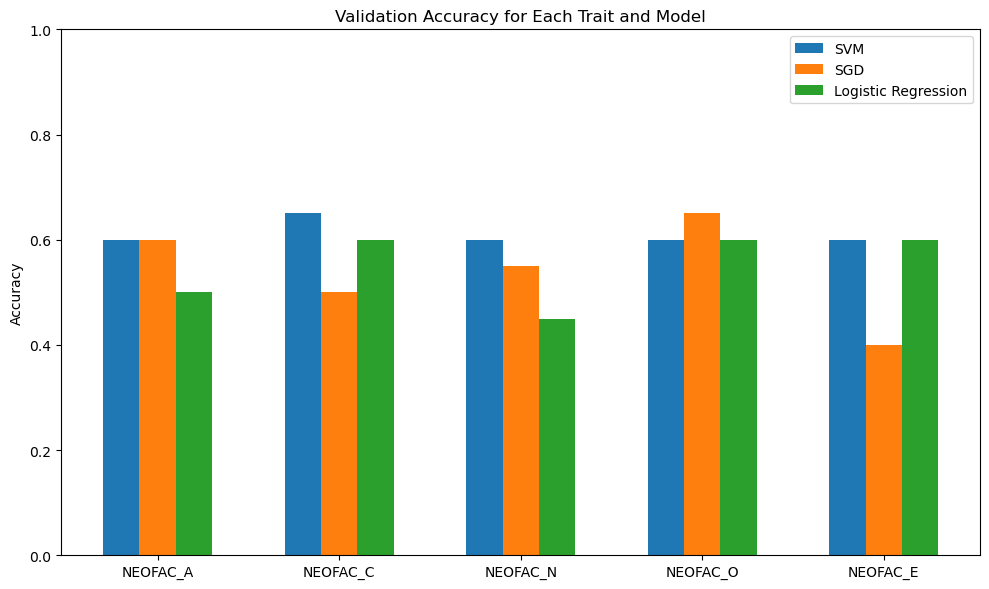

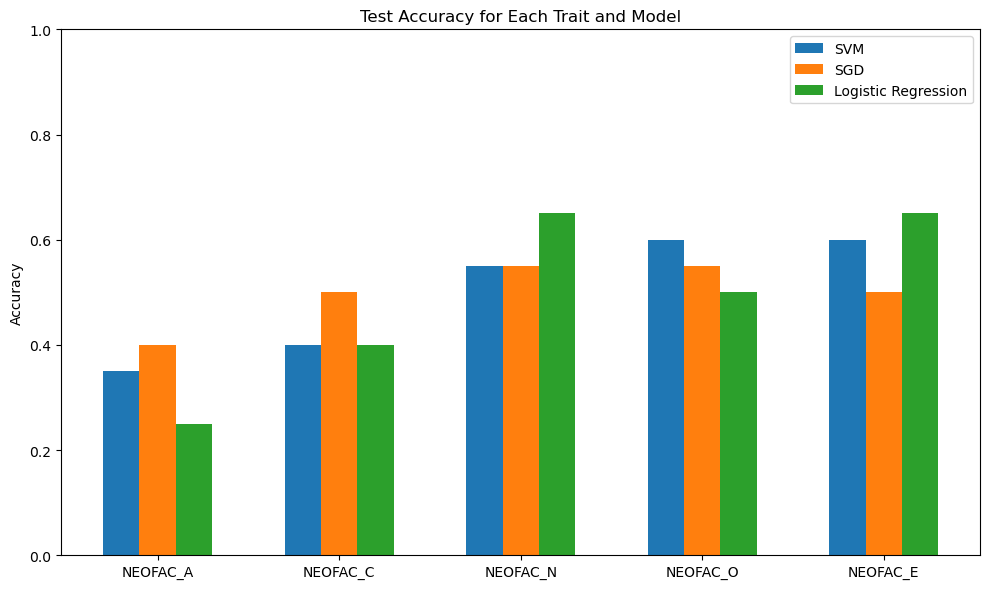

In [35]:
# Plot train and validation accuracy for all traits and models
for metric, label in zip(['train_acc', 'val_acc', 'test_acc'], ['Train', 'Validation', 'Test']):
    plt.figure(figsize=(10,6))
    width = 0.2
    x = np.arange(len(traits))
    for i, model_name in enumerate(models.keys()):
        accs = [results[trait][model_name][metric] for trait in traits]
        plt.bar(x + (i-1)*width, accs, width, label=model_name)
    plt.xticks(x, traits)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.title(f'{label} Accuracy for Each Trait and Model')
    plt.legend()
    plt.tight_layout()
    plt.show()


Trait: NEOFAC_A | Model: SVM
CV Accuracy: 0.517 ± 0.082
Train Accuracy: 0.600
Validation Accuracy: 0.500
Test Accuracy: 0.300
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.31      0.44      0.36         9

    accuracy                           0.30        20
   macro avg       0.30      0.31      0.29        20
weighted avg       0.30      0.30      0.29        20



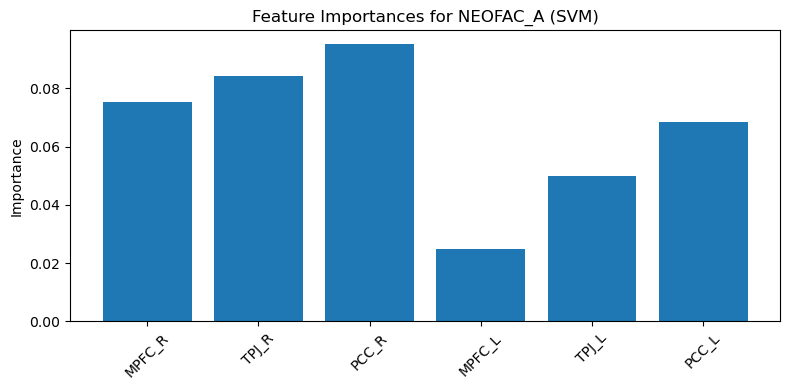


Trait: NEOFAC_A | Model: SGD
CV Accuracy: 0.450 ± 0.067
Train Accuracy: 0.567
Validation Accuracy: 0.550
Test Accuracy: 0.350
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.40      0.47        10
           1       0.54      0.70      0.61        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.54        20
weighted avg       0.55      0.55      0.54        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.09      0.13        11
           1       0.38      0.67      0.48         9

    accuracy                           0.35        20
   macro avg       0.31      0.38      0.31        20
weighted avg       0.31      0.35      0.29        20



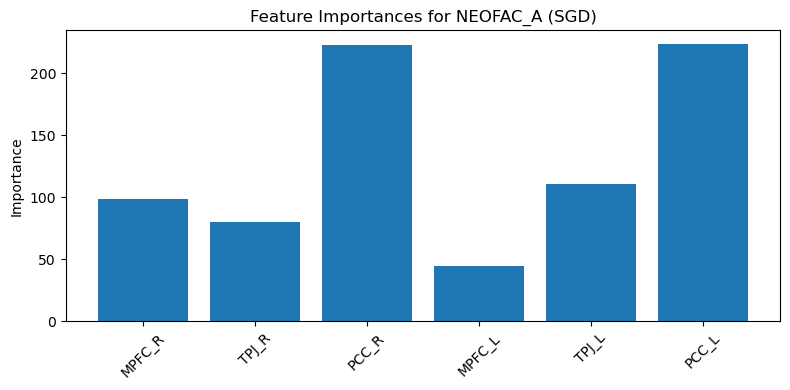


Trait: NEOFAC_A | Model: Logistic Regression
CV Accuracy: 0.533 ± 0.085
Train Accuracy: 0.617
Validation Accuracy: 0.500
Test Accuracy: 0.300
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.18      0.22        11
           1       0.31      0.44      0.36         9

    accuracy                           0.30        20
   macro avg       0.30      0.31      0.29        20
weighted avg       0.30      0.30      0.29        20



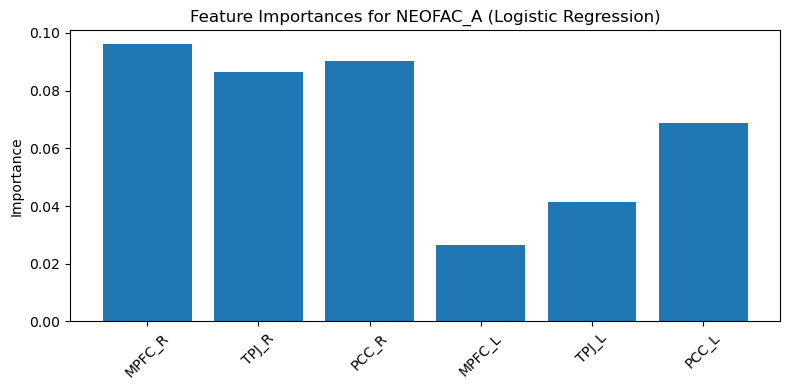


Trait: NEOFAC_C | Model: SVM
CV Accuracy: 0.467 ± 0.085
Train Accuracy: 0.617
Validation Accuracy: 0.550
Test Accuracy: 0.350
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.30      0.33      0.32         9

    accuracy                           0.35        20
   macro avg       0.35      0.35      0.35        20
weighted avg       0.35      0.35      0.35        20



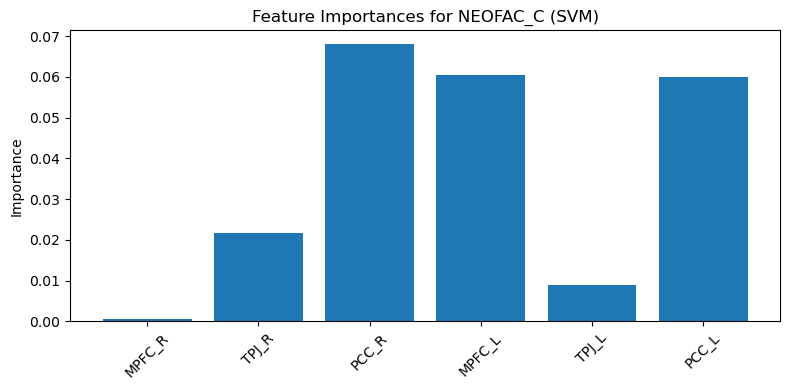


Trait: NEOFAC_C | Model: SGD
CV Accuracy: 0.567 ± 0.133
Train Accuracy: 0.550
Validation Accuracy: 0.500
Test Accuracy: 0.400
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.40      0.67      0.50         9

    accuracy                           0.40        20
   macro avg       0.40      0.42      0.38        20
weighted avg       0.40      0.40      0.36        20



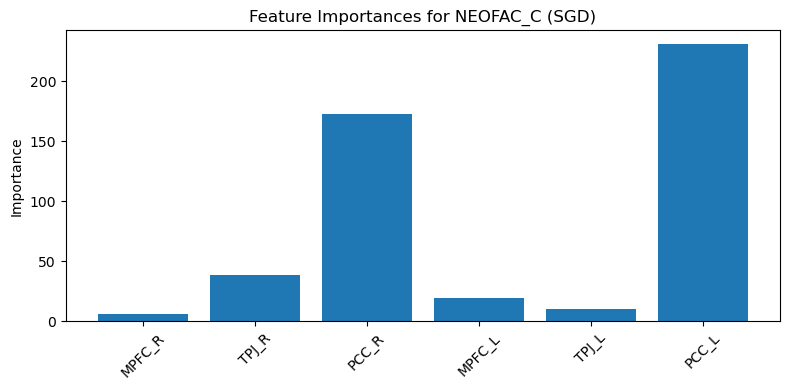


Trait: NEOFAC_C | Model: Logistic Regression
CV Accuracy: 0.450 ± 0.085
Train Accuracy: 0.617
Validation Accuracy: 0.550
Test Accuracy: 0.400
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        11
           1       0.36      0.44      0.40         9

    accuracy                           0.40        20
   macro avg       0.40      0.40      0.40        20
weighted avg       0.41      0.40      0.40        20



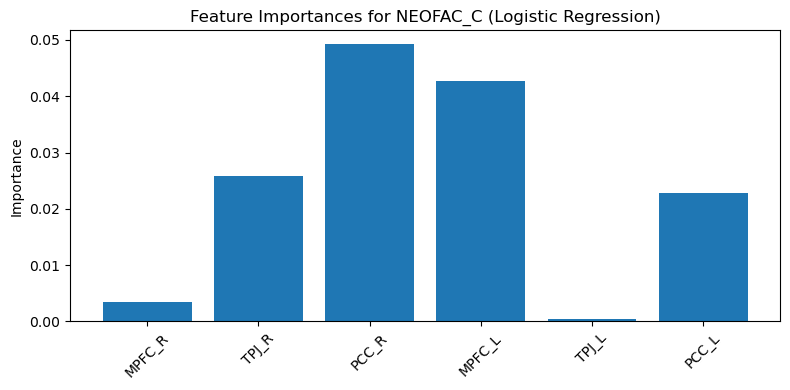


Trait: NEOFAC_N | Model: SVM
CV Accuracy: 0.383 ± 0.085
Train Accuracy: 0.583
Validation Accuracy: 0.600
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.67      0.40      0.50        10

    accuracy                           0.60        20
   macro avg       0.62      0.60      0.58        20
weighted avg       0.62      0.60      0.58        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.50      0.44      0.47         9

    accuracy                           0.55        20
   macro avg       0.54      0.54      0.54        20
weighted avg       0.55      0.55      0.55        20



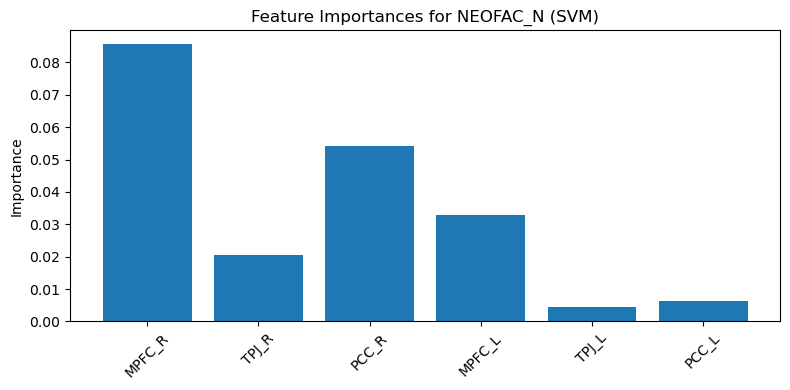


Trait: NEOFAC_N | Model: SGD
CV Accuracy: 0.517 ± 0.207
Train Accuracy: 0.550
Validation Accuracy: 0.450
Test Accuracy: 0.650
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.80      0.59        10
           1       0.33      0.10      0.15        10

    accuracy                           0.45        20
   macro avg       0.40      0.45      0.37        20
weighted avg       0.40      0.45      0.37        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.62      0.56      0.59         9

    accuracy                           0.65        20
   macro avg       0.65      0.64      0.64        20
weighted avg       0.65      0.65      0.65        20



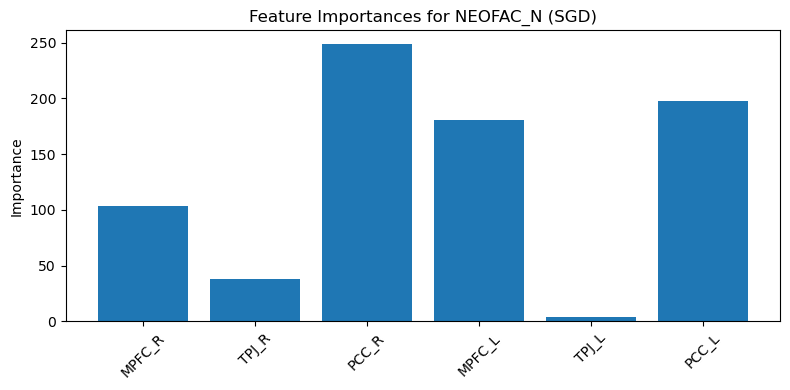


Trait: NEOFAC_N | Model: Logistic Regression
CV Accuracy: 0.483 ± 0.133
Train Accuracy: 0.650
Validation Accuracy: 0.500
Test Accuracy: 0.600
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        10
           1       0.50      0.20      0.29        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.45        20
weighted avg       0.50      0.50      0.45        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



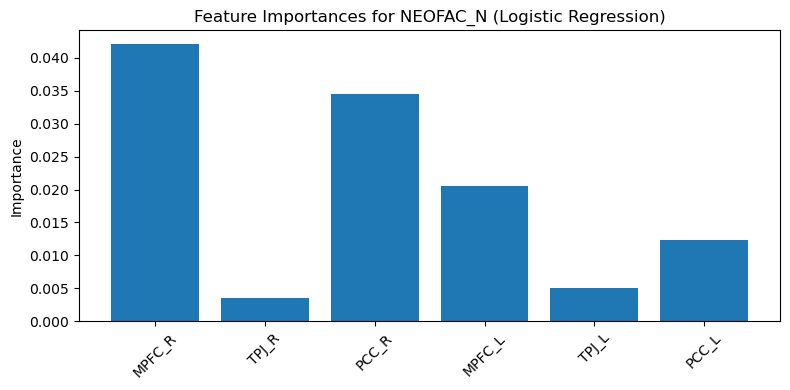


Trait: NEOFAC_O | Model: SVM
CV Accuracy: 0.500 ± 0.118
Train Accuracy: 0.650
Validation Accuracy: 0.500
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.40      0.22      0.29         9

    accuracy                           0.50        20
   macro avg       0.47      0.47      0.45        20
weighted avg       0.47      0.50      0.47        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.22      0.31         9

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20



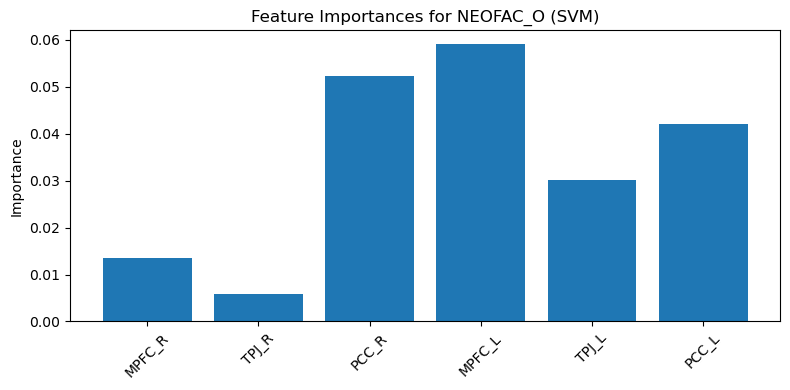


Trait: NEOFAC_O | Model: SGD
CV Accuracy: 0.450 ± 0.100
Train Accuracy: 0.583
Validation Accuracy: 0.500
Test Accuracy: 0.650
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.45      0.56      0.50         9

    accuracy                           0.50        20
   macro avg       0.51      0.51      0.50        20
weighted avg       0.51      0.50      0.50        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.75      0.33      0.46         9

    accuracy                           0.65        20
   macro avg       0.69      0.62      0.60        20
weighted avg       0.68      0.65      0.62        20



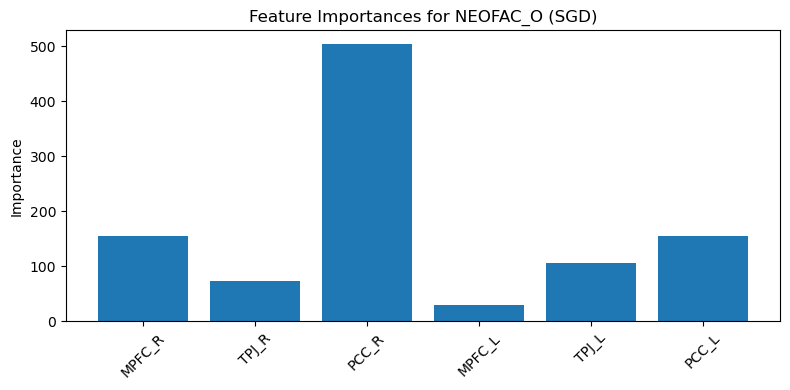


Trait: NEOFAC_O | Model: Logistic Regression
CV Accuracy: 0.500 ± 0.075
Train Accuracy: 0.567
Validation Accuracy: 0.550
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.22      0.31         9

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20



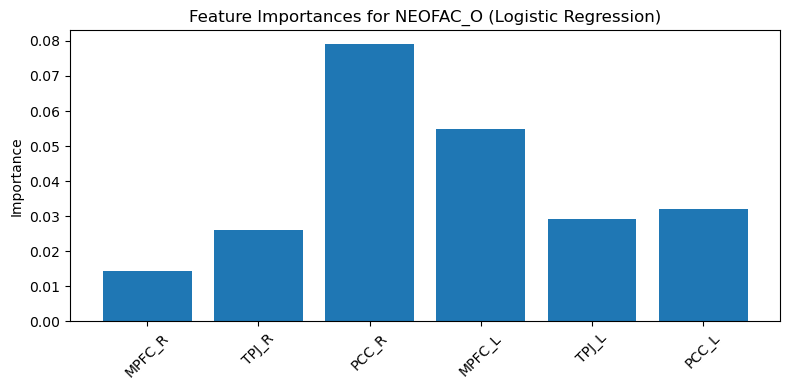


Trait: NEOFAC_E | Model: SVM
CV Accuracy: 0.433 ± 0.062
Train Accuracy: 0.583
Validation Accuracy: 0.500
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.40      0.22      0.29         9

    accuracy                           0.50        20
   macro avg       0.47      0.47      0.45        20
weighted avg       0.47      0.50      0.47        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.50      0.22      0.31         9

    accuracy                           0.55        20
   macro avg       0.53      0.52      0.49        20
weighted avg       0.53      0.55      0.51        20



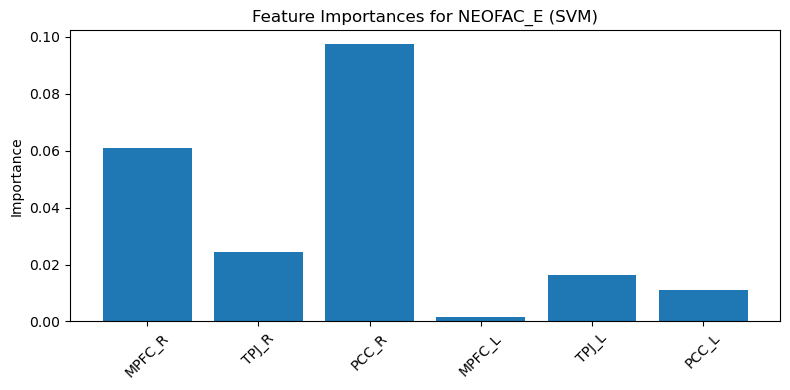


Trait: NEOFAC_E | Model: SGD
CV Accuracy: 0.467 ± 0.113
Train Accuracy: 0.533
Validation Accuracy: 0.500
Test Accuracy: 0.550
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.82      0.64        11
           1       0.33      0.11      0.17         9

    accuracy                           0.50        20
   macro avg       0.43      0.46      0.40        20
weighted avg       0.44      0.50      0.43        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.73      0.64        11
           1       0.50      0.33      0.40         9

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20



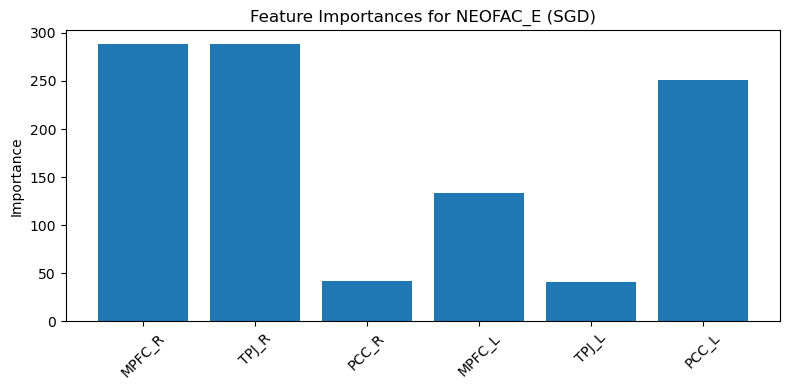


Trait: NEOFAC_E | Model: Logistic Regression
CV Accuracy: 0.367 ± 0.085
Train Accuracy: 0.583
Validation Accuracy: 0.500
Test Accuracy: 0.600
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.73      0.62        11
           1       0.40      0.22      0.29         9

    accuracy                           0.50        20
   macro avg       0.47      0.47      0.45        20
weighted avg       0.47      0.50      0.47        20

Test Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.91      0.71        11
           1       0.67      0.22      0.33         9

    accuracy                           0.60        20
   macro avg       0.63      0.57      0.52        20
weighted avg       0.62      0.60      0.54        20



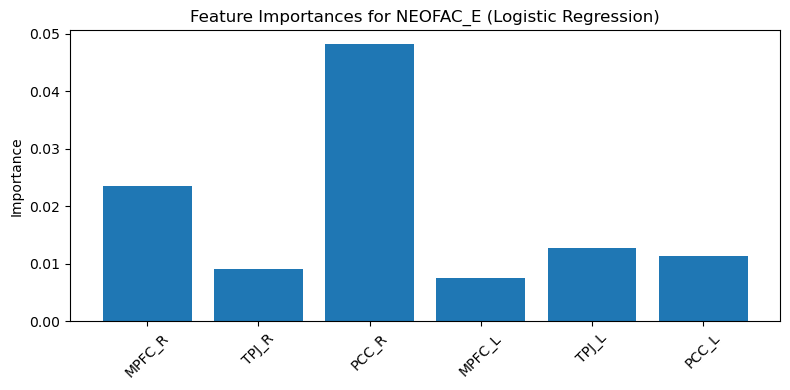

In [36]:
# 2 STEP Training for our brain regions only
results = {trait: {} for trait in traits}

for trait in traits:
    # Binarize target using median split
    median = df[trait].median()
    y = (df[trait] > median).astype(int)
    X = df[features]
    # Split train (60%), temp (40%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    # Split temp into val (20%) and test (20%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    for model_name, model in models.items():
        # Cross-validation on train
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_test_pred = model.predict(X_test)
        train_acc = accuracy_score(y_train, y_train_pred)
        val_acc = accuracy_score(y_val, y_val_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        results[trait][model_name] = {
            'cv_scores': cv_scores,
            'train_acc': train_acc,
            'val_acc': val_acc,
            'test_acc': test_acc,
            'val_report': classification_report(y_val, y_val_pred, output_dict=True),
            'test_report': classification_report(y_test, y_test_pred, output_dict=True),
        }
        # Feature importances or coefficients
        if hasattr(model, 'feature_importances_'):
            results[trait][model_name]['importances'] = model.feature_importances_
        elif hasattr(model, 'coef_'):
            results[trait][model_name]['importances'] = np.abs(model.coef_[0])
        else:
            results[trait][model_name]['importances'] = None

        print(f'\nTrait: {trait} | Model: {model_name}')
        print(f'CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')
        print(f'Train Accuracy: {train_acc:.3f}')
        print(f'Validation Accuracy: {val_acc:.3f}')
        print(f'Test Accuracy: {test_acc:.3f}')
        print('Validation Classification Report:')
        print(classification_report(y_val, y_val_pred))
        print('Test Classification Report:')
        print(classification_report(y_test, y_test_pred))
        # Plot feature importances if available
        if results[trait][model_name]['importances'] is not None:
            plt.figure(figsize=(8,4))
            plt.bar(features, results[trait][model_name]['importances'])
            plt.title(f'Feature Importances for {trait} ({model_name})')
            plt.ylabel('Importance')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

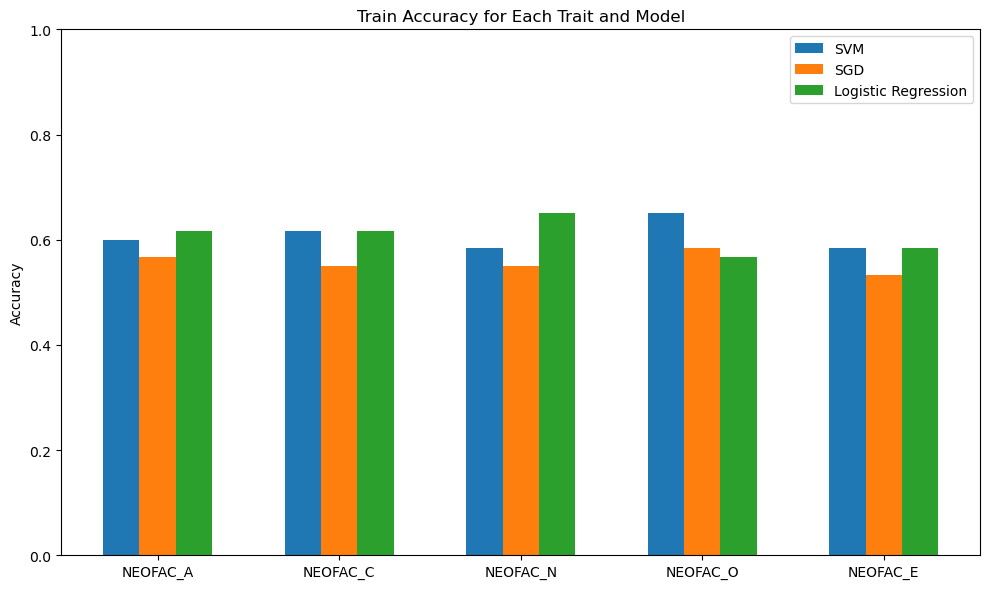

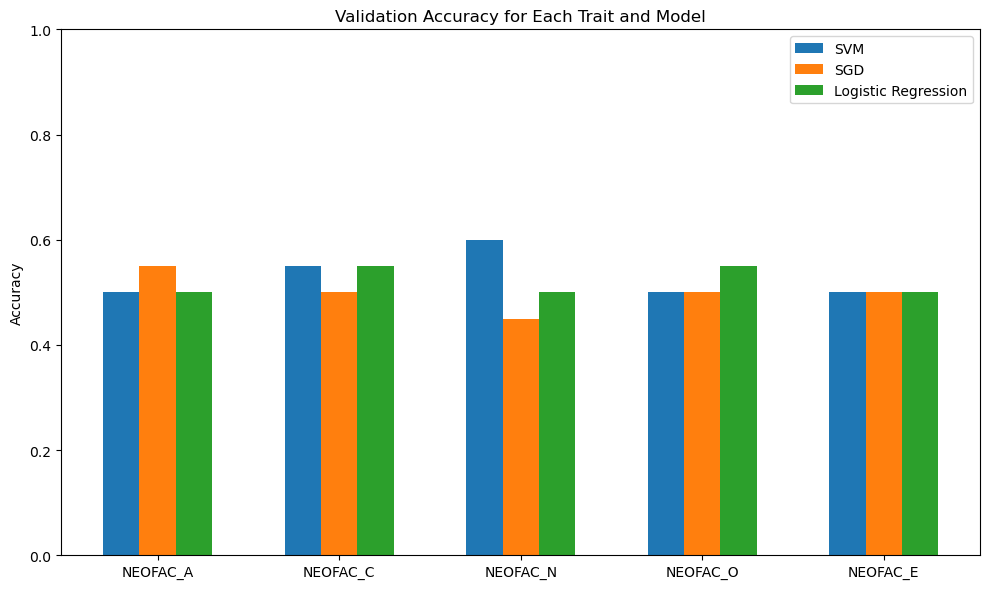

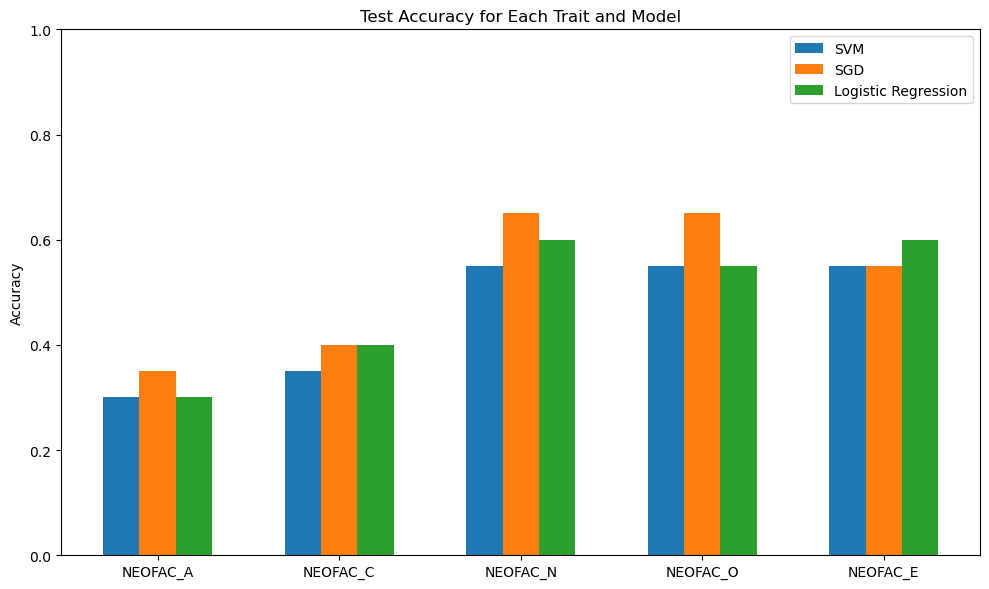

In [37]:
# Plot train and validation accuracy for all traits and models
for metric, label in zip(['train_acc', 'val_acc', 'test_acc'], ['Train', 'Validation', 'Test']):
    plt.figure(figsize=(10,6))
    width = 0.2
    x = np.arange(len(traits))
    for i, model_name in enumerate(models.keys()):
        accs = [results[trait][model_name][metric] for trait in traits]
        plt.bar(x + (i-1)*width, accs, width, label=model_name)
    plt.xticks(x, traits)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.title(f'{label} Accuracy for Each Trait and Model')
    plt.legend()
    plt.tight_layout()
    plt.show()

KeyError: 'val_acc'